In [1]:
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [4]:
# 예제 데이터 셋
# 데이터프레임 형식

raw = sns.load_dataset('tips')

In [5]:
raw.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [ ]:
# seaborn 함수 기본 형태
# sns.그래프종류(data=데이터프레임, x='total_bill', y='tip', hue='sex')

In [ ]:
# 데이터 분포 살펴보기 (수치형-수치형 일때)
# relplot(data=df, x=. y=, kind='scatter')
# kind 옵션 : scatter(기본값), line

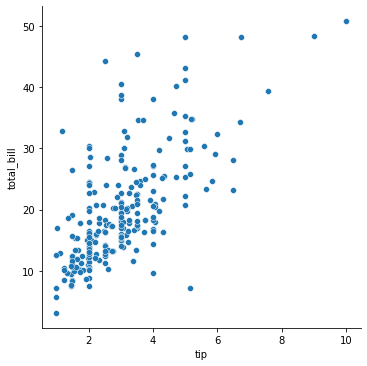

In [8]:
sns.relplot(data=raw, x='tip', y='total_bill')

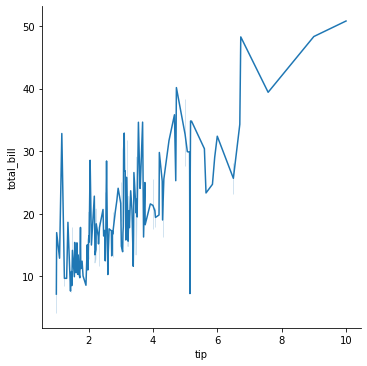

In [11]:
sns.relplot(data=raw, x='tip', y='total_bill',kind='line')

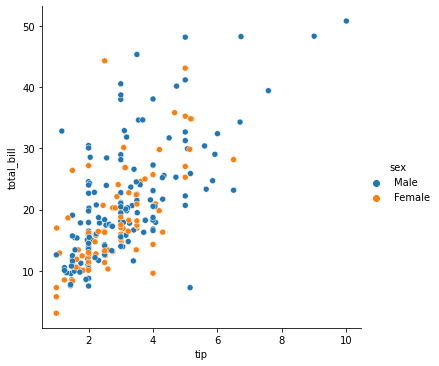

In [12]:
# 성별에 따른 색상 구분

sns.relplot(data=raw, x='tip',y='total_bill', hue='sex')

In [ ]:
# jointplot
# sns.jointplot(data=raw, x='tip', y='total_bill')
# kind 값 변경 scatter(기본값), reg(point + regression), kde(누적분포 차트/지도)

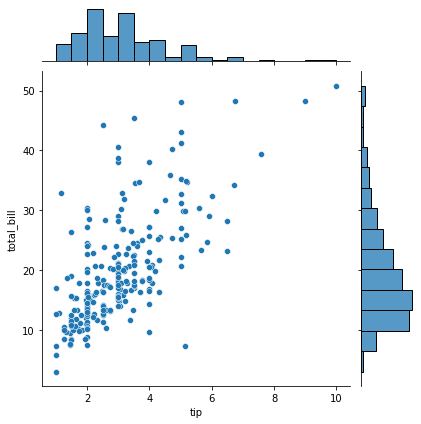

In [13]:
sns.jointplot(data=raw, x='tip', y='total_bill')

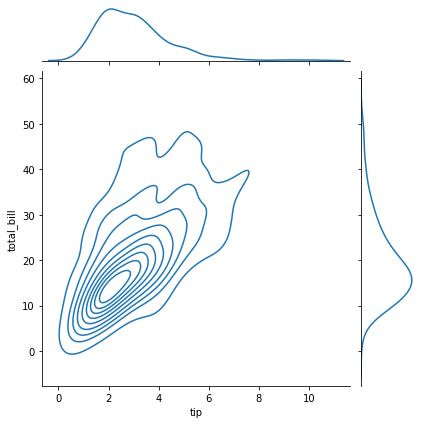

In [14]:
sns.jointplot(data=raw, x='tip', y='total_bill', kind='kde')

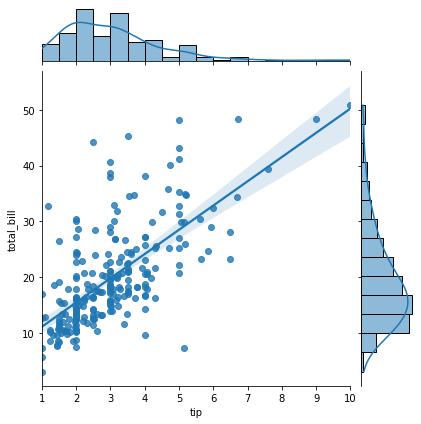

In [16]:
sns.jointplot(data=raw, x='tip', y='total_bill', kind='reg')

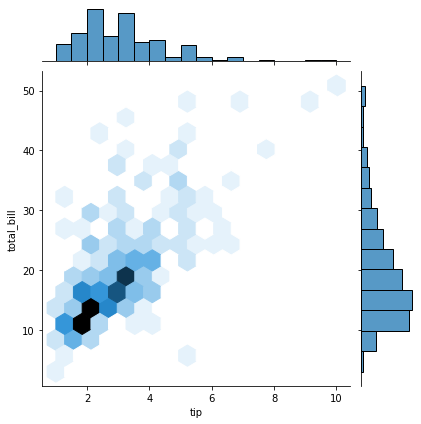

In [18]:
sns.jointplot(data=raw, x='tip', y='total_bill', kind='hex')

In [ ]:
# pairplot(data=df)
# df의 모든 수치형데이터 컬럼에서 두 컬럼씩 관계를 시각화 함

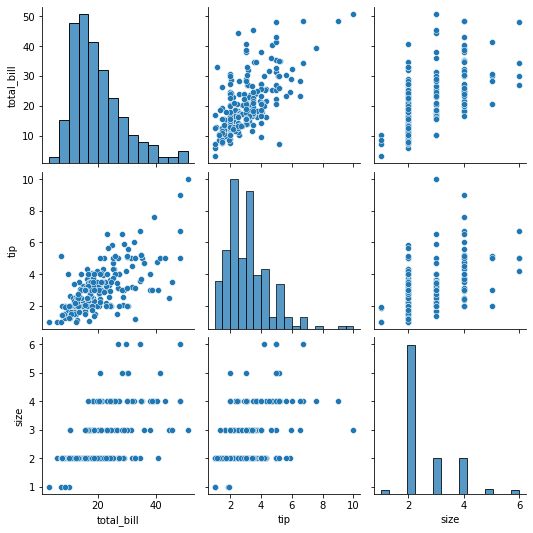

In [19]:
sns.pairplot(data=raw)

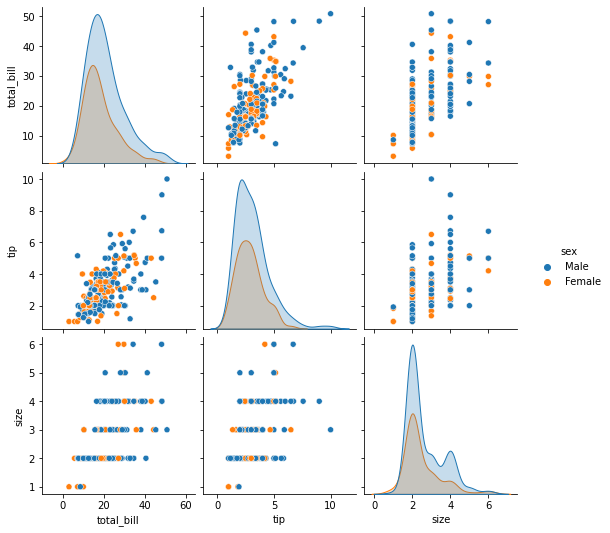

In [20]:
sns.pairplot(data=raw, hue='sex')

In [ ]:
# 데이터 분포 살펴보기(수치형-범주형)
# boxplot(data=df, x=, y=, hue=)

<AxesSubplot:xlabel='day', ylabel='tip'>

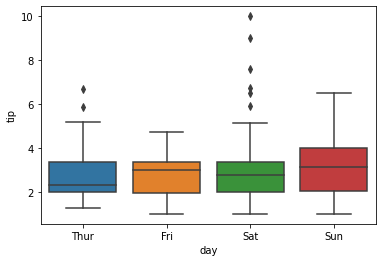

In [21]:
sns.boxplot(data=raw, x='day', y='tip')

<AxesSubplot:xlabel='day', ylabel='tip'>

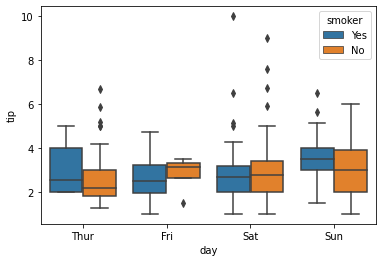

In [22]:
sns.boxplot(data=raw, x='day', y='tip', hue='smoker')

In [ ]:
# boxplot은 하나의 기준에 대한 데이터 분포범위를 파악하는데 용이 하나 
# 데이터의 개수를 표현하지는 않기 때문에 데이터 개수가 다른 값은 비교하기에는 문제가 있을수 있음
# swarmplot을 이용하면 데이터 개수와 함께 분포를 살펴볼 수있음

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='day', ylabel='tip'>

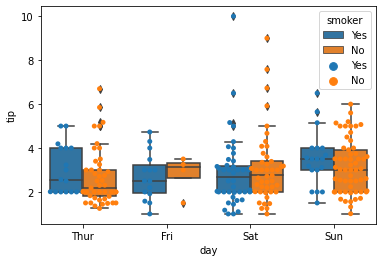

In [30]:
sns.swarmplot(data=raw, x='day', y='tip', hue='smoker', dodge=True)
sns.boxplot(data=raw, x='day', y='tip', hue='smoker')

# dodge=True 는 유형별로 떨어지게 만듦

<AxesSubplot:xlabel='size', ylabel='tip'>

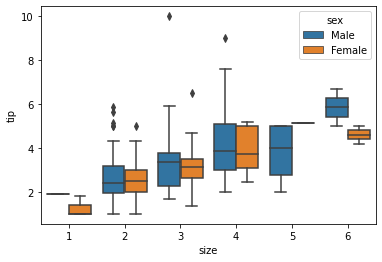

In [31]:
# size별 tip의 분포

sns.boxplot(data=raw, x='size', y='tip', hue='sex')

<AxesSubplot:xlabel='size', ylabel='tip'>

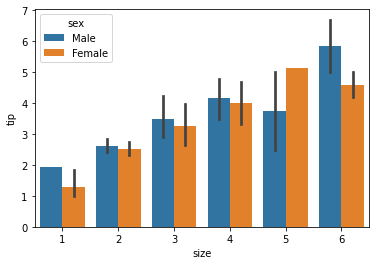

In [34]:
# barplot 특정값에 대한 개수 살피기
# 막대 길이는 평균치, 선 길이는 95% 신뢰구간

sns.barplot(data=raw, x='size', y='tip', hue='sex')

In [36]:
raw.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# 데이터 분포 살펴보가(수치형-범주형-범주형)
# heatmap(data=df)

In [37]:
# df형태로 미리 준비해야함

df= raw.pivot_table(index='day', columns='size', values='tip', aggfunc='mean')
df

size,1,2,3,4,5,6
day,,,,,,
Thur,1.83,2.442500,2.692500,4.218000,5.000000,5.3
Fri,1.92,2.644375,3.000000,4.730000,NaN,NaN
Sat,1.00,2.517547,3.797778,4.123846,3.000000,NaN
Sun,NaN,2.816923,3.120667,4.087778,4.046667,5.0


<AxesSubplot:xlabel='size', ylabel='day'>

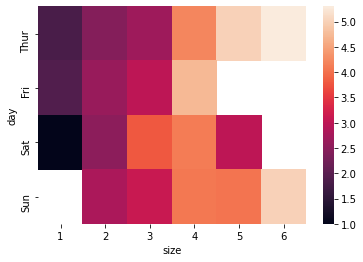

In [38]:
sns.heatmap(data=df)

In [ ]:
# heatmap 내에 수치도 입력 가능
# annot=True 인 경우 수치입력됨, 숫자 형태는 fmt옵션으로 지정
# fmt='.2f' 인 경우 , 소수점 두자리 까지라는 의미
# fmt='.0f' 인 경우 정수 표현

<AxesSubplot:xlabel='size', ylabel='day'>

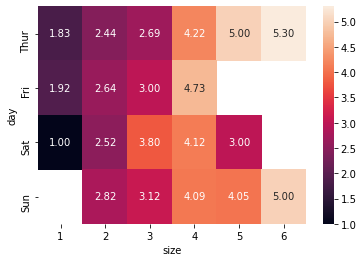

In [41]:
sns.heatmap(data=df, annot=True, fmt='.2f')

<AxesSubplot:xlabel='size', ylabel='day'>

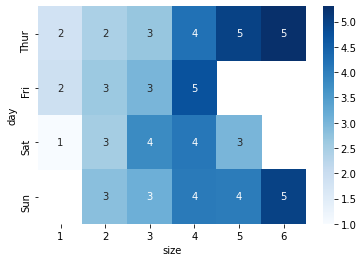

In [50]:
# cmap 으로 색상조정

sns.heatmap(data=df,
           annot=True, fmt='.0f',
           cmap='Blues')